
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [ ]:
#NOTE:this will work for python3.11 

import numpy as np
import matplotlib.pyplot as plt


Matplotlib is building the font cache; this may take a moment.


In [5]:

# Implement StandardScaler manually ,  first read about it, how it works and then implement it 
class StandardScalerManual:
    def fit(self, X):
        self.mean=np.mean(X,axis=0)
        self.std=np.std(X,axis=0)
        pass
    
    def transform(self, X):
        return (X-self.mean)/self.std
        pass
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
        pass


In [ ]:
X = np.array([
    [10,100],
    [20,200],
    [30,300]
])
scaler=StandardScalerManual()
X_scaled=scaler.fit_transform(X)# here is the example teaken cared of
#here the X_scaled tells us how far the point is from the mean data


print(X_scaled)


[[-1.22474487 -1.22474487]
 [ 0.          0.        ]
 [ 1.22474487  1.22474487]]


In [7]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda 
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr;self.epochs=epochs;self.l2=l2_lambda #this function is used to initialise the the values 
        pass

    def fit(self, X, y):#this function learns and updates the values according to the errors
        self.w=np.zeros(X.shape[1]);self.b=0
        n=len(y)
        for _ in range(self.epochs):
            yhat=X@self.w+self.b
            self.w+=self.lr*((X.T@(y-yhat))/n-2*self.l2*self.w) 
            self.b+=self.lr*np.mean(y-yhat)
        pass

    def predict(self, X):
        return X@self.w+self.b #this function accordingly predicts the y values
        pass


In [8]:
X=np.array([[1],[2],[3],[4]])# this is just for checking the outputs are correct or not

y=np.array([2,4,6,8])
model=LinearRegressionManual(lr=0.05,epochs=2000)
model.fit(X,y)



print("w:",model.w)
print("b:",model.b)


w: [1.99999994]
b: 1.8175855995556407e-07



## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


In [11]:

#Implement sigmoid function as told in the lectures 
def sigmoid(z):
    return 1/(1+np.exp(-z))
    pass


In [ ]:

#Implement Logistic Regression from scratch and here also add the regularizaation term 
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr=lr
        self.epochs=epochs
        self.l2=l2_lambda
        pass

    def fit(self, X, y): #this is the code fonr the the change of linear regression to logistic regression 
        n,m=X.shape
        self.w=np.zeros(m)
        self.b=0
        self.losses=[]
        for _ in range(self.epochs):
            z=X@self.w+self.b # here we use the sigmoid function to do so by putting the output in a constraint '0' to '1'
            yi=sigmoid(z)

            loss=-np.mean(y*np.log(yi+1e-9)+(1-y)*np.log(1-yi+1e-9))
            loss+=self.l2*np.sum(self.w**2)
            self.losses.append(loss)

            dw=(X.T@(yi-y))/n+2*self.l2*self.w
            db=np.mean(yi-y)

            self.w-=self.lr*dw
            self.b-=self.lr*db

        pass

    def predict_proba(self, X):
        return sigmoid(X@self.w+self.b)
        pass

    def predict(self, X):
        return (self.predict_proba(X)>=0.5).astype(int)#then finally we return all the values asked in the question
        pass


accuracy: 1.0


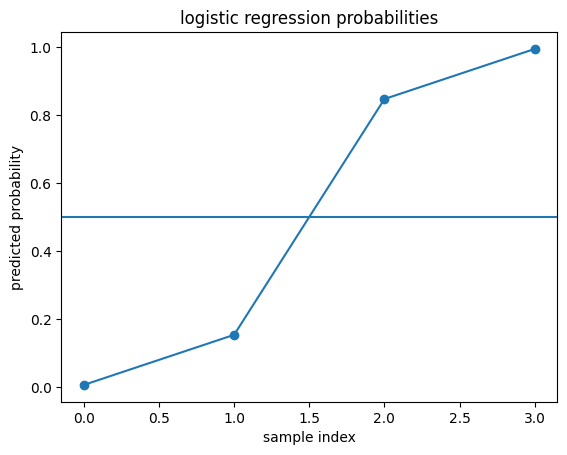

In [ ]:
X=np.array([[1,2],[2,3],[3,4],[4,5]])
y=np.array([0,0,1,1])

scaler=StandardScalerManual()
X=scaler.fit_transform(X)

model=LogisticRegressionManual(lr=0.1,epochs=2000,l2_lambda=0.01)
model.fit(X,y)

pred=model.predict(X)
acc=np.mean(pred==y)

print("accuracy:",acc)
probs = model.predict_proba(X)

plt.figure()
plt.plot(range(len(probs)),probs,marker='o')
plt.axhline(0.5)
plt.xlabel("sample index")
plt.ylabel("predicted probability")
plt.title("logistic regression probabilities")
plt.show()
# in this example not only i have used the example but also plot it for better understandig 

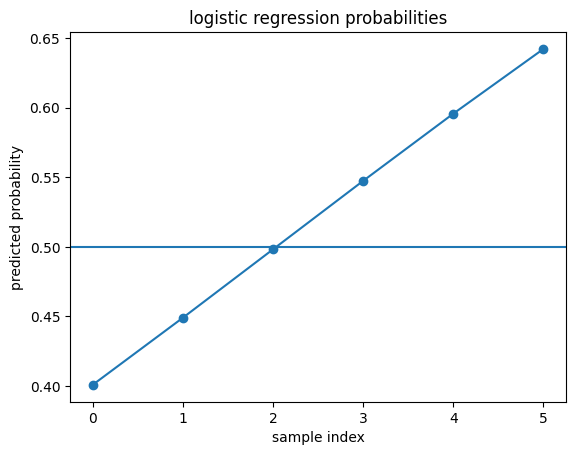

In [16]:
X = np.array([
    [1,1],
    [1.5,1.5],
    [2,2],
    [2.5,2.5],
    [3,3],
    [3.5,3.5]
])

y = np.array([0,1,0,1,0,1])

model = LogisticRegressionManual(lr=0.05,epochs=500)
model.fit(X,y)

probs = model.predict_proba(X)

plt.figure()
plt.plot(range(len(probs)),probs,marker='o')
plt.axhline(0.5)
plt.xlabel("sample index")
plt.ylabel("predicted probability")
plt.title("logistic regression probabilities")
plt.show()



## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [ ]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT ! 
def kmeans_matrix(M, k, max_iters=100):
    n,m=M.shape
    flat_vals=M.flatten()
    centroids=np.random.choice(flat_vals,k,replace=False)
    assignment_table=np.zeros((n,m),dtype=int)

    for _ in range(max_iters):
        old_centroids=centroids.copy()
        for i in range(n):
            for j in range(m):
                distances=np.abs(M[i,j]-centroids) #In this implementation, each matrix element is treated as a data point. 
                assignment_table[i,j]=np.argmin(distances)

        for c in range(k):
            cluster_vals=[]
            for i in range(n):
                for j in range(m):
                    if assignment_table[i,j]==c:
                        cluster_vals.append(M[i,j])
            if len(cluster_vals)>0:
                centroids[c]=np.mean(cluster_vals)

        if np.allclose(old_centroids,centroids):#The algorithm assigns elements to the nearest centroid and updates centroids using the mean until convergence.
            break

    cookbook={c:[] for c in range(k)}
    for i in range(n):
        for j in range(m):
            c=assignment_table[i,j]
            cookbook[c].append((i,j))

    return assignment_table,cookbook,centroids
    
    '''
    Returns:
    assignment_table: same shape as M, contains cluster labels
    cookbook: dict -> cluster_id : list of (i, j) positions
    centroids: numpy array of centroid values
    '''
    pass


In [19]:
import numpy as np

np.random.seed(0)

M=np.array([
 [1,2,8],
 [2,3,9],
 [1,2,10]
])

k=2

assignment,cookbook,centroids=kmeans_matrix(M,k)

print("matrix M:")
print(M)

print("\nassignment table:")
print(assignment)

print("\ncentroids:")
print(centroids)

print("\ncookbook:")
for c in cookbook:
    print(c,":",cookbook[c])


matrix M:
[[ 1  2  8]
 [ 2  3  9]
 [ 1  2 10]]

assignment table:
[[0 0 1]
 [0 0 1]
 [0 0 1]]

centroids:
[1 9]

cookbook:
0 : [(0, 0), (0, 1), (1, 0), (1, 1), (2, 0), (2, 1)]
1 : [(0, 2), (1, 2), (2, 2)]



## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.
